In [1]:
import pandas as pd

df = pd.read_csv("Data/dataset.csv")
print(df.head())
print(df.columns)

         Unnamed: 0  Unnamed: 1             Unnamed: 2             Unnamed: 3  \
0  Fungal infection     itching              skin_rash   nodal_skin_eruptions   
1  Fungal infection   skin_rash   nodal_skin_eruptions    dischromic _patches   
2  Fungal infection     itching   nodal_skin_eruptions    dischromic _patches   
3  Fungal infection     itching              skin_rash    dischromic _patches   
4  Fungal infection     itching              skin_rash   nodal_skin_eruptions   

             Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8  \
0   dischromic _patches        NaN        NaN        NaN        NaN   
1                   NaN        NaN        NaN        NaN        NaN   
2                   NaN        NaN        NaN        NaN        NaN   
3                   NaN        NaN        NaN        NaN        NaN   
4                   NaN        NaN        NaN        NaN        NaN   

  Unnamed: 9 Unnamed: 10 Unnamed: 11 Unnamed: 12 Unnamed: 13 Unnamed: 14  \
0        N

In [2]:

# Load without headers
df = pd.read_csv("Data/dataset.csv", header=None, skiprows=1)

# Rename first column
df.rename(columns={0: 'disease'}, inplace=True)

# Combine all symptom columns into one comma-separated string
df['symptoms'] = df.iloc[:, 1:].apply(lambda row: ', '.join(row.dropna().astype(str)), axis=1)

# Keep only 'disease' and 'symptoms' columns
df_clean = df[['disease', 'symptoms']]

# Preview
print(df_clean.head())

            disease                                           symptoms
0  Fungal infection  itching,  skin_rash,  nodal_skin_eruptions,  d...
1  Fungal infection   skin_rash,  nodal_skin_eruptions,  dischromic...
2  Fungal infection  itching,  nodal_skin_eruptions,  dischromic _p...
3  Fungal infection          itching,  skin_rash,  dischromic _patches
4  Fungal infection         itching,  skin_rash,  nodal_skin_eruptions


In [3]:
# Optional: Save cleaned version
df_clean.to_csv("Data/dataset_new.csv", index=False)

In [4]:
print(df_clean.columns)

Index(['disease', 'symptoms'], dtype='object')


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Load the cleaned dataset
df = pd.read_csv("Data/dataset_new.csv")

# Basic info
print("Total records:", len(df))
print("Unique diseases:", df['disease'].nunique())
print("\nSample rows:")
print(df.head())


Total records: 4920
Unique diseases: 41

Sample rows:
            disease                                           symptoms
0  Fungal infection  itching,  skin_rash,  nodal_skin_eruptions,  d...
1  Fungal infection   skin_rash,  nodal_skin_eruptions,  dischromic...
2  Fungal infection  itching,  nodal_skin_eruptions,  dischromic _p...
3  Fungal infection          itching,  skin_rash,  dischromic _patches
4  Fungal infection         itching,  skin_rash,  nodal_skin_eruptions


In [6]:
# --- Disease Frequency ---
disease_counts = df['disease'].value_counts()
print("\nTop 10 most common diseases:")
print(disease_counts.head(10))



Top 10 most common diseases:
disease
Fungal infection                120
Hepatitis C                     120
Hepatitis E                     120
Alcoholic hepatitis             120
Tuberculosis                    120
Common Cold                     120
Pneumonia                       120
Dimorphic hemmorhoids(piles)    120
Heart attack                    120
Varicose veins                  120
Name: count, dtype: int64


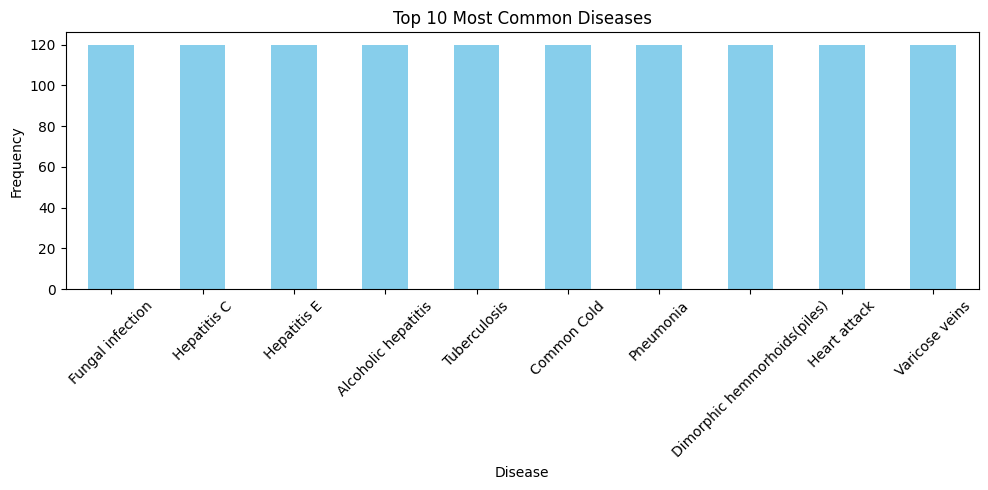

In [7]:

# Plot: Top 10 Diseases
plt.figure(figsize=(10, 5))
disease_counts.head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Most Common Diseases")
plt.xlabel("Disease")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


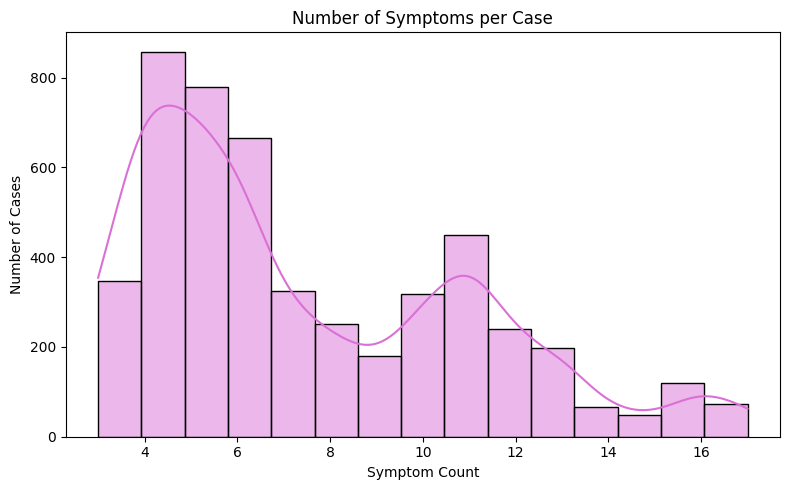

In [8]:

# --- Number of Symptoms per Case ---
df['num_symptoms'] = df['symptoms'].apply(lambda x: len(x.split(',')))
plt.figure(figsize=(8, 5))
sns.histplot(df['num_symptoms'], bins=15, kde=True, color='orchid')
plt.title("Number of Symptoms per Case")
plt.xlabel("Symptom Count")
plt.ylabel("Number of Cases")
plt.tight_layout()
plt.show()


In [9]:

# --- Most Common Symptoms Overall ---
# Flatten all symptoms into a list
all_symptoms = df['symptoms'].str.split(',').explode().str.strip()
symptom_counts = all_symptoms.value_counts()

print("\nTop 15 most common symptoms:")
print(symptom_counts.head(15))



Top 15 most common symptoms:
symptoms
fatigue              1932
vomiting             1914
high_fever           1362
loss_of_appetite     1152
nausea               1146
headache             1134
abdominal_pain       1032
yellowish_skin        912
yellowing_of_eyes     816
chills                798
skin_rash             786
malaise               702
chest_pain            696
joint_pain            684
sweating              678
Name: count, dtype: int64


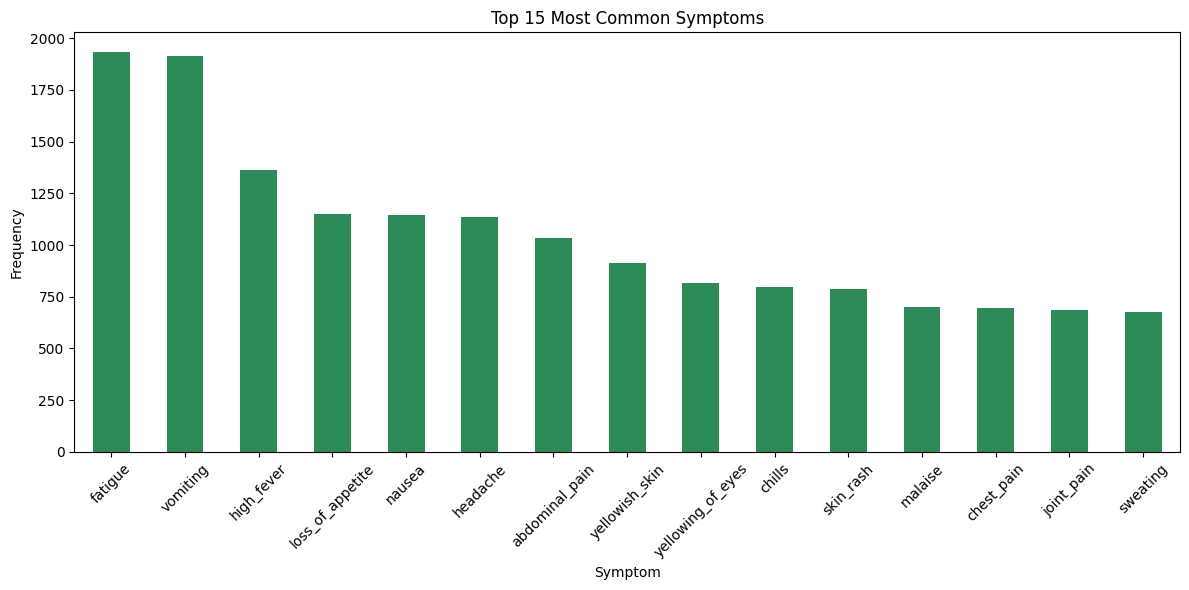

In [10]:

# Plot: Most Frequent Symptoms
plt.figure(figsize=(12, 6))
symptom_counts.head(15).plot(kind='bar', color='seagreen')
plt.title("Top 15 Most Common Symptoms")
plt.xlabel("Symptom")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

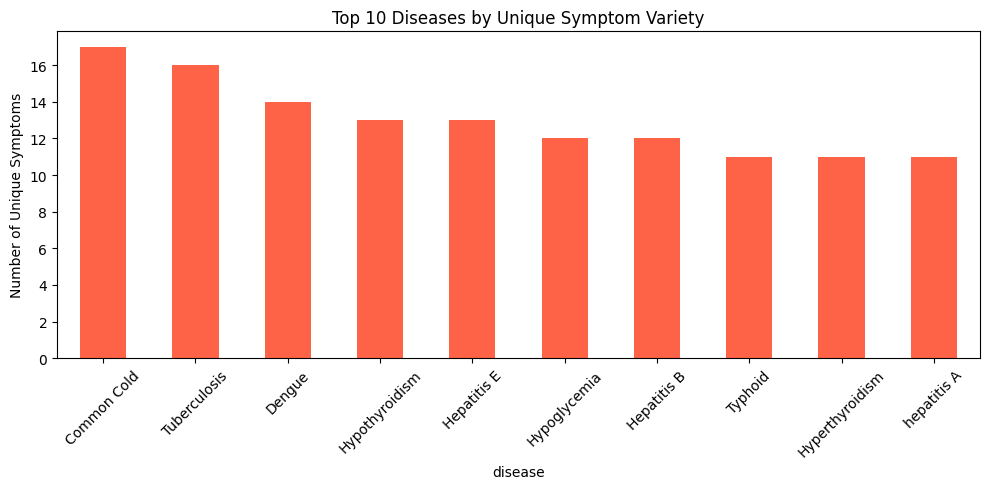

In [11]:
# Number of unique symptoms for each disease (aggregated)
df['symptom_list'] = df['symptoms'].apply(lambda x: [s.strip() for s in x.split(',')])
disease_symptom_counts = df.groupby('disease')['symptom_list'].apply(lambda x: set(sum(x.tolist(), []))).apply(len)

# Plot top 10 complex diseases
disease_symptom_counts.sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10, 5), color='tomato')
plt.title("Top 10 Diseases by Unique Symptom Variety")
plt.ylabel("Number of Unique Symptoms")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/Users/pankhuri/Library/Python/3.9/lib/python/site-packages/sklearn/preprocessing/_label.py:909: UserWarning: unknown class(es) ['abnormal_menstruation', 'acidity', 'acute_liver_failure', 'altered_sensorium', 'anxiety', 'back_pain', 'belly_pain', 'blackheads', 'bladder_discomfort', 'blister', 'blood_in_sputum', 'bloody_stool', 'blurred_and_distorted_vision', 'breathlessness', 'brittle_nails', 'bruising', 'burning_micturition', 'chest_pain', 'cold_hands_and_feets', 'coma', 'congestion', 'constipation', 'continuous_feel_of_urine', 'continuous_sneezing', 'cough', 'cramps', 'dark_urine', 'dehydration', 'depression', 'diarrhoea', 'dischromic _patches', 'distention_of_abdomen', 'dizziness', 'drying_and_tingling_lips', 'enlarged_thyroid', 'excessive_hunger', 'extra_marital_contacts', 'family_history', 'fast_heart_rate', 'fluid_overload', 'foul_smell_of urine', 'hip_joint_pain', 'history_of_alcohol_consumption', 'increased_appetite', 'indigestion', 'inflammatory_nails', 'internal_itching', 'ir

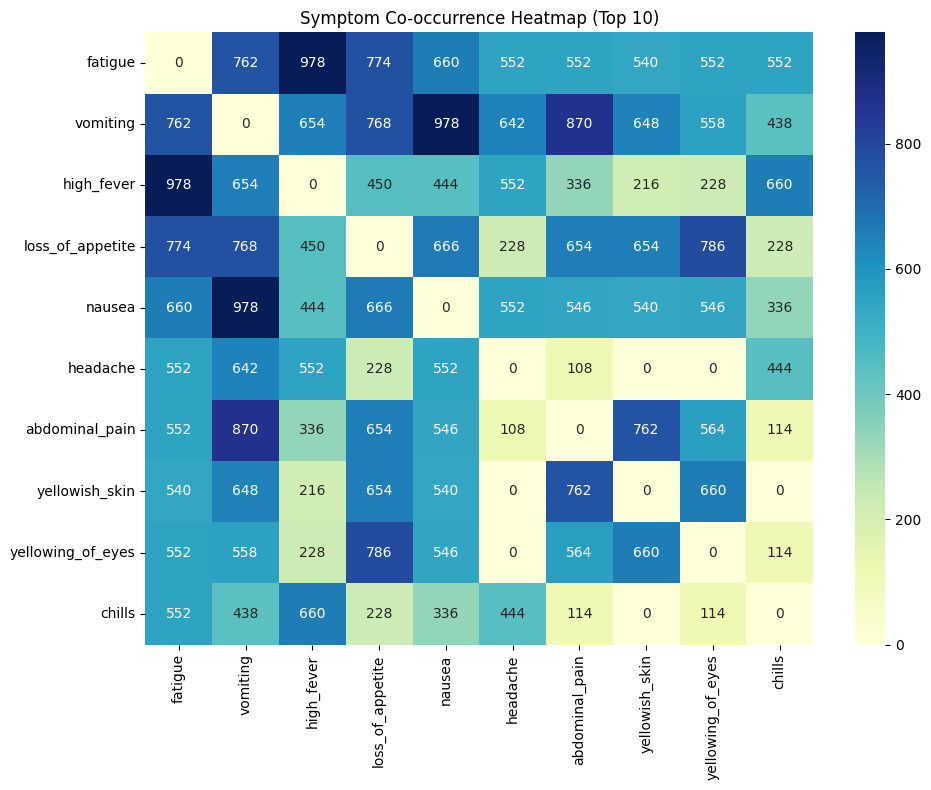

In [12]:
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer

df['symptom_list'] = df['symptoms'].apply(lambda x: [s.strip() for s in x.split(',')])

# Flatten and count frequency of each symptom
all_symptoms = pd.Series([s for sublist in df['symptom_list'] for s in sublist])
top_symptoms = all_symptoms.value_counts().head(10).index.tolist()

# Use only top symptoms for co-occurrence
mlb = MultiLabelBinarizer(classes=top_symptoms)
symptom_matrix = mlb.fit_transform(df['symptom_list'])

symptom_df = pd.DataFrame(symptom_matrix, columns=mlb.classes_)

# Compute co-occurrence matrix
co_occurrence = symptom_df.T.dot(symptom_df)
np.fill_diagonal(co_occurrence.values, 0)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(co_occurrence, cmap='YlGnBu', annot=True, fmt='d')
plt.title("Symptom Co-occurrence Heatmap (Top 10)")
plt.tight_layout()
plt.show()

Number of unique diseases: 41
Most common disease: Fungal infection → 120 cases
Least common disease: Fungal infection → 120 cases
Class imbalance ratio (max/min): 1.0


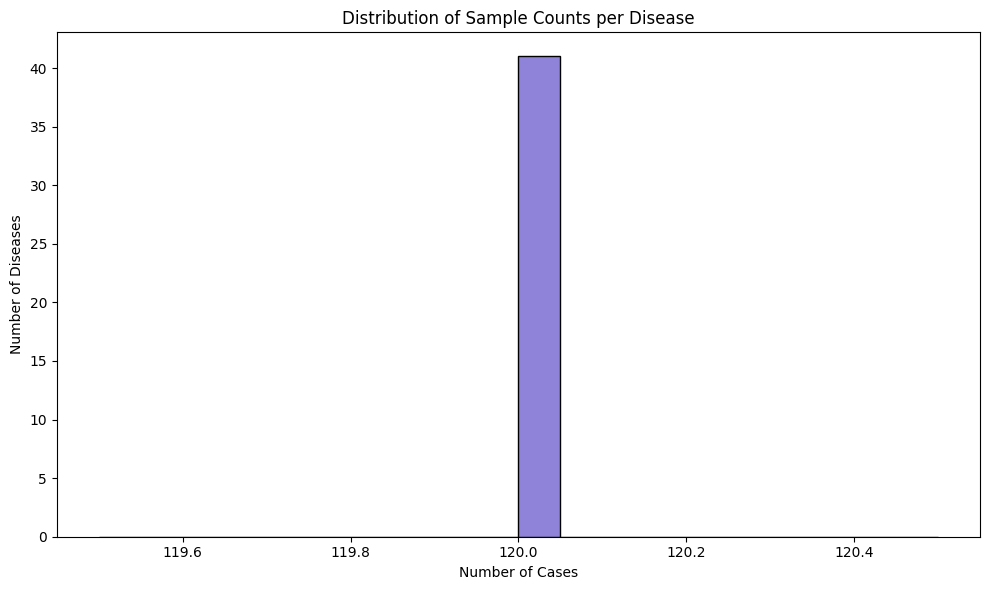

In [13]:
# Count number of samples per disease
disease_counts = df['disease'].value_counts()

# Print basic stats
print("Number of unique diseases:", df['disease'].nunique())
print("Most common disease:", disease_counts.idxmax(), "→", disease_counts.max(), "cases")
print("Least common disease:", disease_counts.idxmin(), "→", disease_counts.min(), "cases")
print("Class imbalance ratio (max/min):", round(disease_counts.max() / disease_counts.min(), 2))

# Plot distribution
plt.figure(figsize=(10, 6))
sns.histplot(disease_counts, bins=20, color='slateblue')
plt.title("Distribution of Sample Counts per Disease")
plt.xlabel("Number of Cases")
plt.ylabel("Number of Diseases")
plt.tight_layout()
plt.show()

Top 10 most shared symptoms across diseases:
fatigue             17
vomiting            17
high_fever          12
headache            10
loss_of_appetite    10
nausea              10
abdominal_pain       9
yellowish_skin       8
skin_rash            7
chills               7
dtype: int64


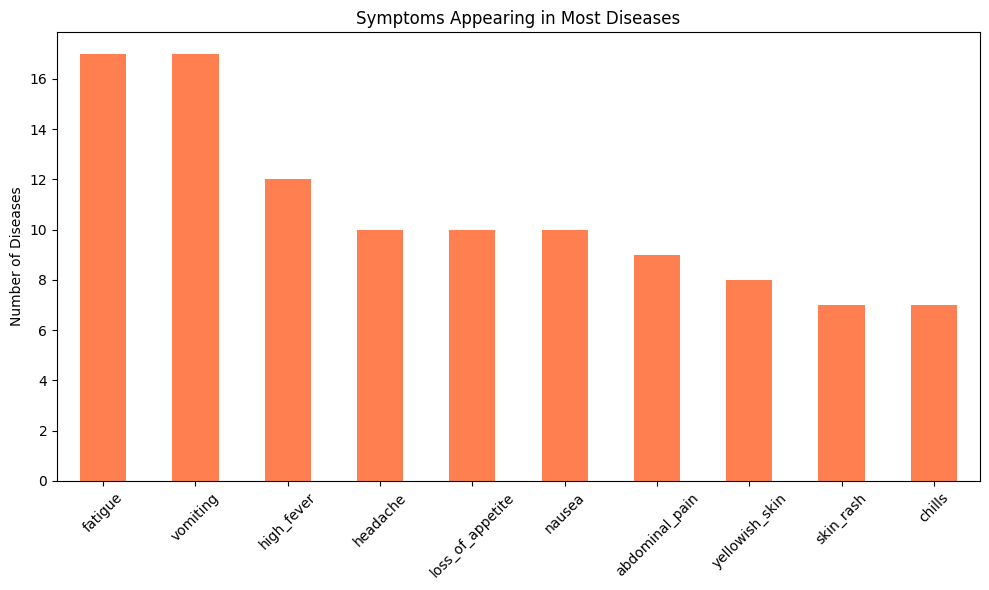

In [14]:
from collections import defaultdict

# Create a mapping: symptom → set of diseases it appears in
symptom_disease_map = defaultdict(set)

for _, row in df.iterrows():
    disease = row['disease']
    for symptom in row['symptom_list']:
        symptom_disease_map[symptom].add(disease)

# Count how many diseases each symptom appears in
symptom_shared_counts = {s: len(diseases) for s, diseases in symptom_disease_map.items()}
symptom_shared_series = pd.Series(symptom_shared_counts).sort_values(ascending=False)

# Display top 10 shared symptoms
print("Top 10 most shared symptoms across diseases:")
print(symptom_shared_series.head(10))

# Optional: Visualize
plt.figure(figsize=(10, 6))
symptom_shared_series.head(10).plot(kind='bar', color='coral')
plt.title("Symptoms Appearing in Most Diseases")
plt.ylabel("Number of Diseases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
# import matplotlib.pyplot as plt

# Preprocessing
X = df['symptoms']
y = df['disease']

In [16]:
vectorizer = TfidfVectorizer()
X_vec = vectorizer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)
print("Training size:", X_train.shape[0])
print("Test size:", X_test.shape[0])

Training size: 3936
Test size: 984


In [17]:
# Initialize and train Logistic Regression
logreg_model = LogisticRegression(max_iter=1000)  # max_iter ensures convergence
logreg_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [18]:
# Evaluate Logistic Regression
y_pred_logreg = logreg_model.predict(X_test)
print("🔍 Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))

🔍 Logistic Regression Classification Report:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        18
                                   AIDS       1.00      1.00      1.00        30
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        25
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        23
                       Bronchial Asthma       1.00      1.00      1.00        33
                   Cervical spondylosis       1.00      1.00      1.00        23
                            Chicken pox       1.00      1.00      1.00        21
                    Chronic cholestasis       1.00      1.00      1.00        15
                            Common Cold       1.00      1.00   

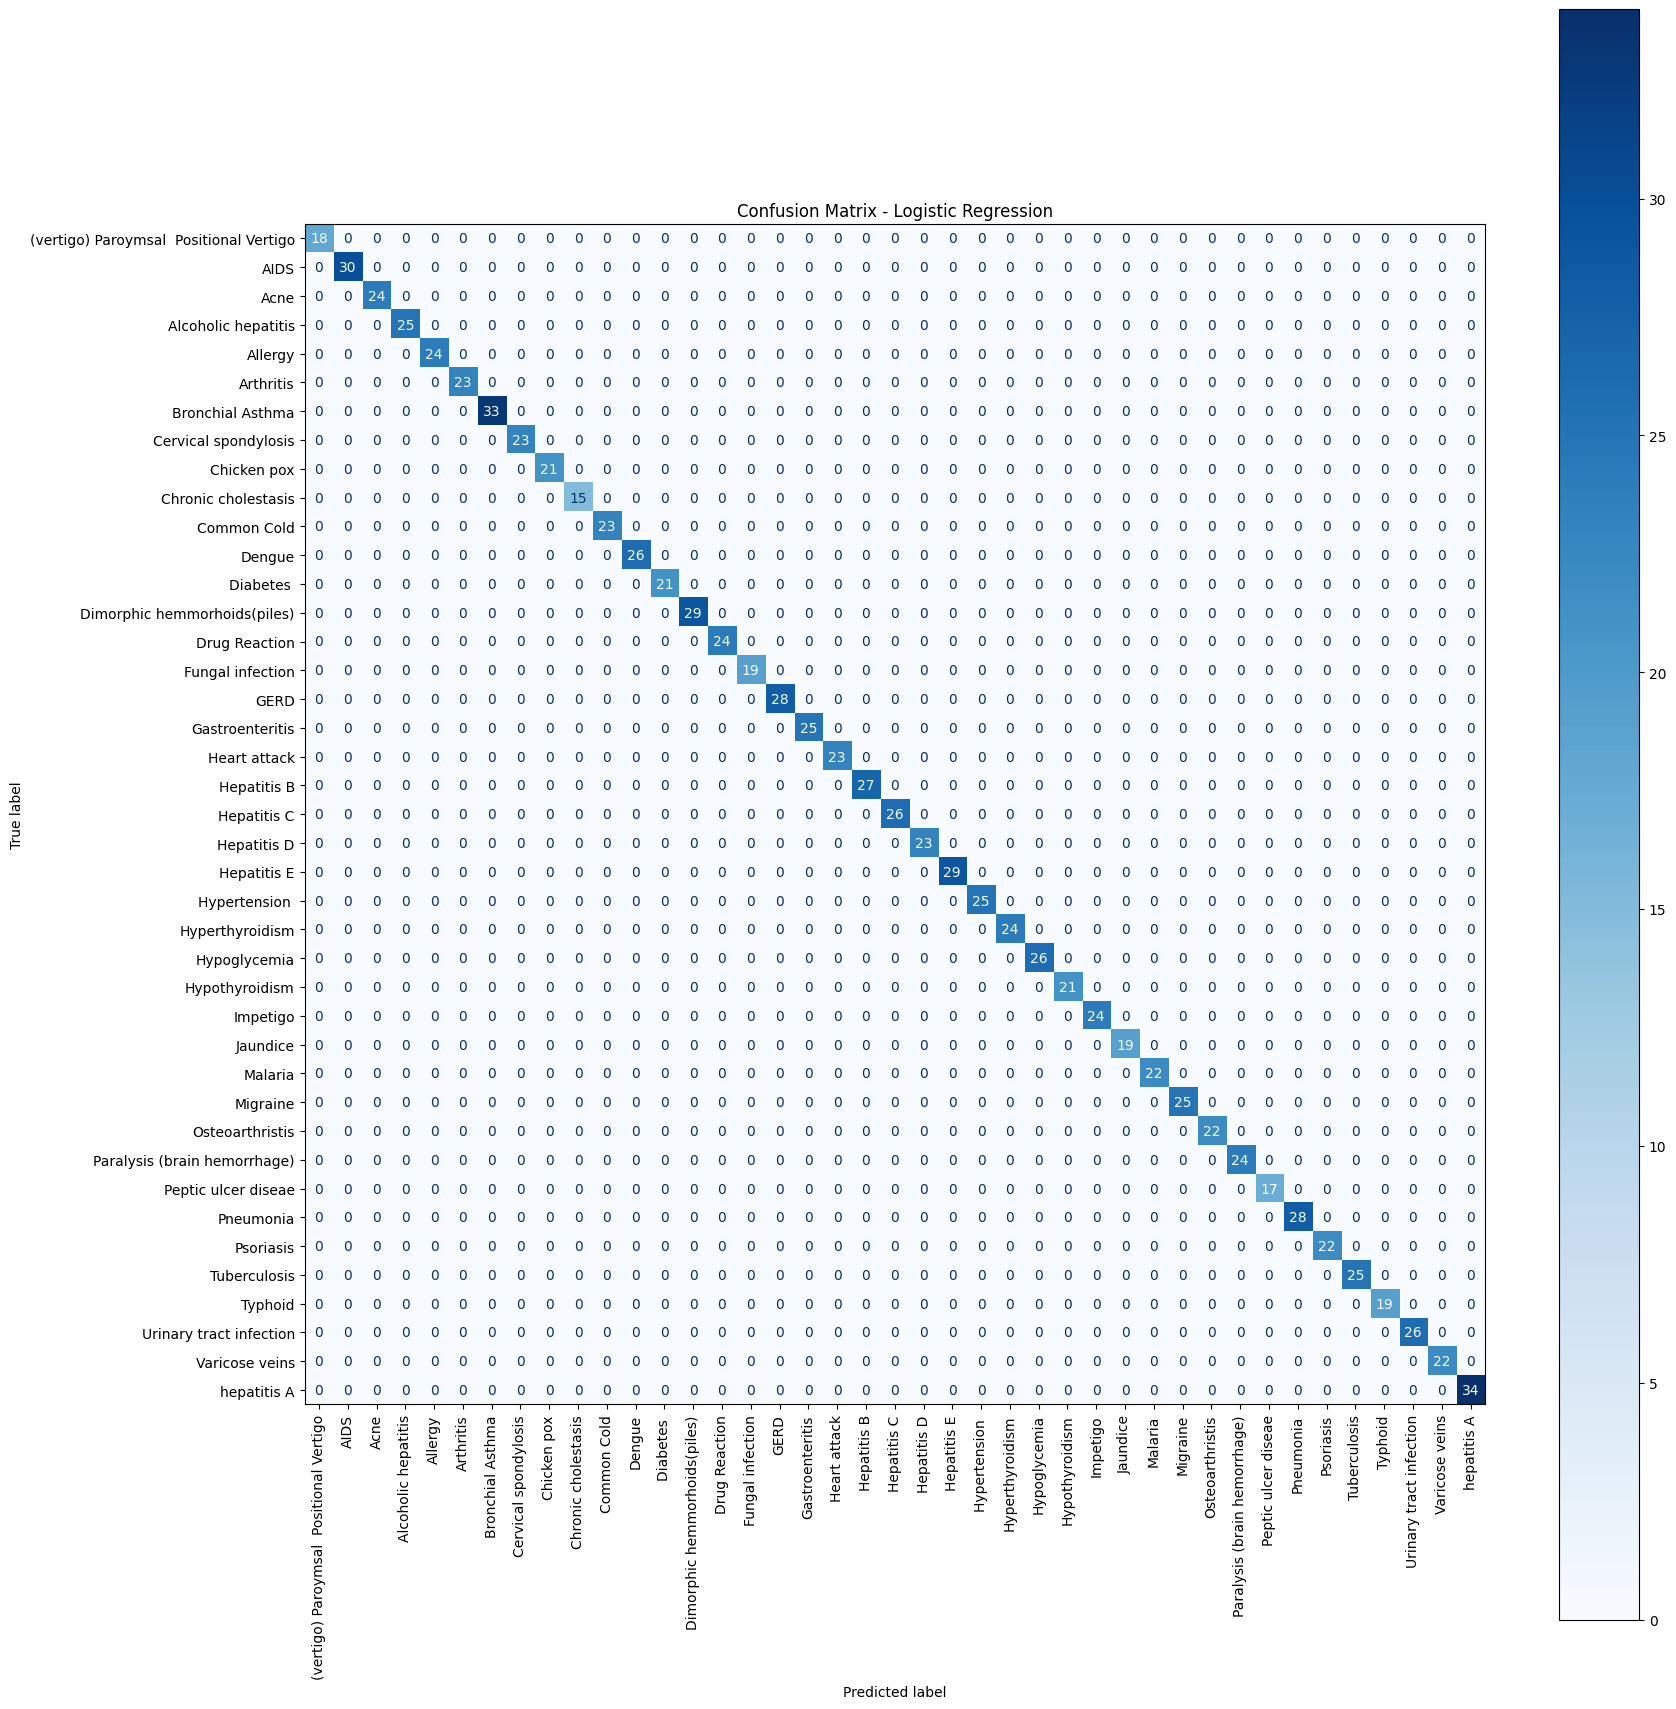

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_logreg = confusion_matrix(y_test, y_pred_logreg, labels=logreg_model.classes_)
disp_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_logreg, display_labels=logreg_model.classes_)

# Plot with increased size and better formatting
fig, ax = plt.subplots(figsize=(18, 18))  # Adjust size as needed
disp_logreg.plot(ax=ax, cmap='Blues', xticks_rotation=90)
plt.title("Confusion Matrix - Logistic Regression")
plt.tight_layout()
plt.show()

In [20]:
from sklearn.preprocessing import label_binarize

# Binarize y labels for multiclass AUC calculation
classes = sorted(y.unique())  # list of all class labels
y_test_bin = label_binarize(y_test, classes=classes)

# Get predicted probabilities (not class labels)
y_score = logreg_model.predict_proba(X_test)


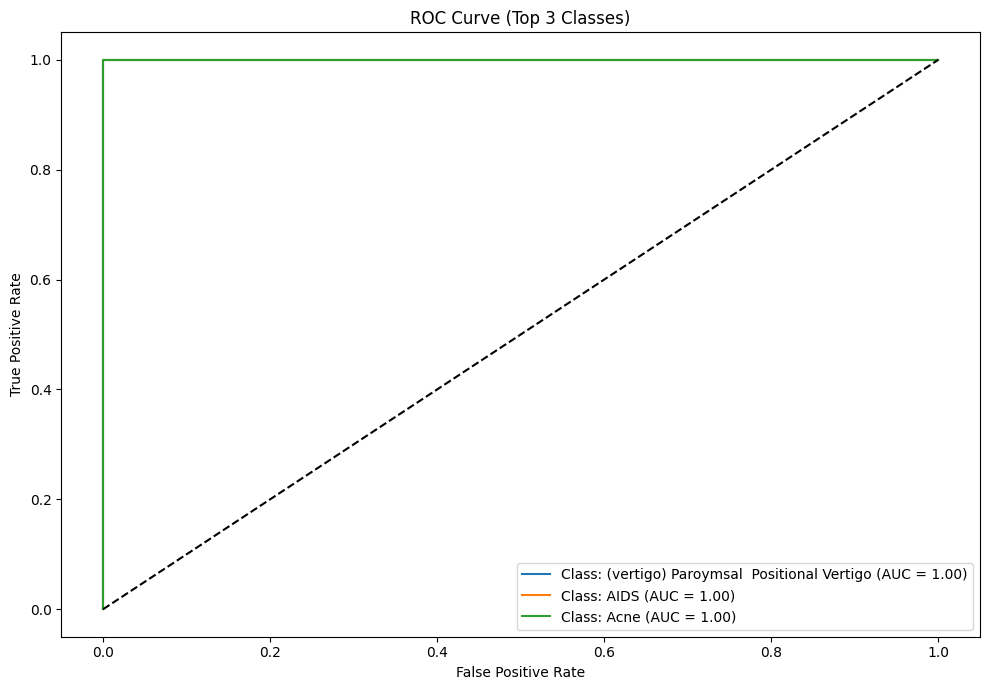

In [21]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import label_binarize
# import matplotlib.pyplot as plt
# import numpy as np

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for top 3 classes (for simplicity)
plt.figure(figsize=(10, 7))
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f"Class: {classes[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Top 3 Classes)')
plt.legend()
plt.tight_layout()
plt.show()


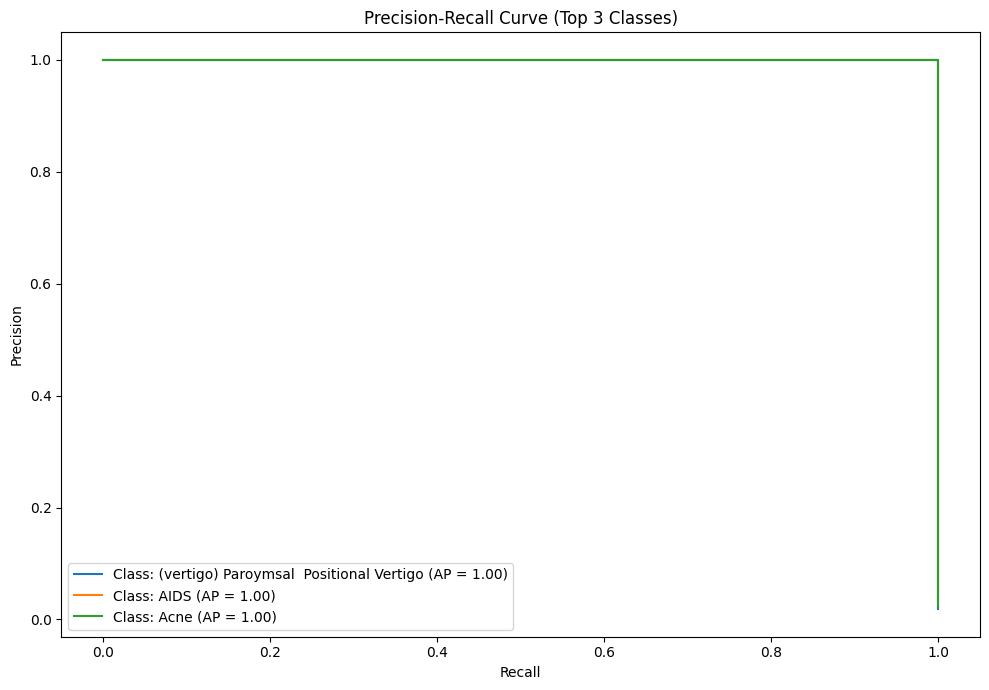

In [22]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision = dict()
recall = dict()
avg_precision = dict()

for i in range(len(classes)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
    avg_precision[i] = average_precision_score(y_test_bin[:, i], y_score[:, i])

# Plot Precision-Recall for top 3 classes
plt.figure(figsize=(10, 7))
for i in range(3):
    plt.plot(recall[i], precision[i], label=f"Class: {classes[i]} (AP = {avg_precision[i]:.2f})")

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Top 3 Classes)')
plt.legend()
plt.tight_layout()
plt.show()


In [23]:
from sklearn.metrics import log_loss
from sklearn.metrics import top_k_accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import brier_score_loss
loss = log_loss(y_test, y_score)
print("Log Loss:", loss)


top3_acc = top_k_accuracy_score(y_test, y_score, k=3, labels=logreg_model.classes_)
print("Top-3 Accuracy:", top3_acc)


kappa = cohen_kappa_score(y_test, y_pred_logreg)
print("Cohen’s Kappa:", kappa)


brier = brier_score_loss(y_test_bin[:, 0], y_score[:, 0])
print("Brier Score (Class 0):", brier)

Log Loss: 0.09028365152448928
Top-3 Accuracy: 1.0
Cohen’s Kappa: 1.0
Brier Score (Class 0): 0.00018153035726125682
